# Assignment 6
1. Use yeast dataset from UCI http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data
2. Remove the first column and use the last column as the target
3. Only leave CYT and VAC classes
4. Replace [0.3, 0.5, 0.7] in feature 2 to null
5. Replace [0.26, 0.36, 0.64] in feature 3 to null
6. Split the data

7. Impute the data (or not, it's your call)
8. Build a outlier detection model to classify VAC from CYT, i.e. 0 from 1
9. Build a classifer using sample augmentation techniques to flassify VAC from CYT, i.e. 0 from 1
10. Try different methods and hyper paramters

11. Report perfromance using F-1 score

In [37]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data'
col_names = ('yeast', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'target')
df = pd.read_fwf(url,header =None)
df.columns = col_names

In [2]:
df_copy = df.copy()

In [23]:
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
5,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,1
9,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,1
12,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,1
15,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,1
16,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,1
...,...,...,...,...,...,...,...,...,...
1475,0.71,NaN,0.50,0.18,0.5,0.0,0.46,0.22,1
1476,0.61,0.48,0.54,0.25,0.5,0.0,0.50,0.22,1
1477,0.38,0.32,NaN,0.41,0.5,0.0,0.44,0.11,1
1478,0.38,0.40,0.66,0.35,0.5,0.0,0.43,0.11,1


In [44]:
df = df.drop(df.columns[[0]], axis=1)

In [25]:
df

,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
5,0.40,0.56,0.17,0.5,0.5,0.49,0.22,1
9,0.39,0.60,0.15,0.5,0.0,0.58,0.30,1
12,0.42,0.57,0.35,0.5,0.0,0.53,0.25,1
15,0.44,0.52,0.11,0.5,0.0,0.50,0.22,1
16,0.39,0.50,0.11,0.5,0.0,0.49,0.40,1
...,...,...,...,...,...,...,...,...
1475,NaN,0.50,0.18,0.5,0.0,0.46,0.22,1
1476,0.48,0.54,0.25,0.5,0.0,0.50,0.22,1
1477,0.32,NaN,0.41,0.5,0.0,0.44,0.11,1
1478,0.40,0.66,0.35,0.5,0.0,0.43,0.11,1


In [38]:
indexNames = df[ (df['target'] != 'VAC') & (df['target'] != 'CYT') ].index

In [39]:
df.drop(indexNames , inplace=True)

In [40]:
df

,yeast,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
5,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
9,ABP1_YEAST,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT
12,ACH1_YEAST,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,CYT
15,ACT_YEAST,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,CYT
16,ACT2_YEAST,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,CYT
...,...,...,...,...,...,...,...,...,...,...
1475,YP53_YEAST,0.71,0.50,0.50,0.18,0.5,0.0,0.46,0.22,CYT
1476,YPT7_YEAST,0.61,0.48,0.54,0.25,0.5,0.0,0.50,0.22,CYT
1477,R29A_YEAST,0.38,0.32,0.64,0.41,0.5,0.0,0.44,0.11,CYT
1478,R29B_YEAST,0.38,0.40,0.66,0.35,0.5,0.0,0.43,0.11,CYT


In [41]:
import numpy as np
df['feature2'] = df['feature2'].replace({0.3:np.nan, 0.5:np.nan, 0.7:np.nan})

In [42]:
df['feature3'] = df['feature3'].replace({0.26:np.nan, 0.36:np.nan, 0.64:np.nan})

In [45]:
df['target'] = df['target'].replace(['VAC'], 0)
df['target'] = df['target'].replace(['CYT'], 1)
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
5,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,1
9,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,1
12,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,1
15,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,1
16,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,1
...,...,...,...,...,...,...,...,...,...
1475,0.71,NaN,0.50,0.18,0.5,0.0,0.46,0.22,1
1476,0.61,0.48,0.54,0.25,0.5,0.0,0.50,0.22,1
1477,0.38,0.32,NaN,0.41,0.5,0.0,0.44,0.11,1
1478,0.38,0.40,0.66,0.35,0.5,0.0,0.43,0.11,1


In [46]:
#Here we turn into numpy arrays
X = df.iloc[:,0:8].values
y = df.iloc[:,8].values.ravel()

In [47]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=20, stratify=y)

In [55]:
#Impute the data as feature2 and feature3 contain null(NaN) values
from sklearn.impute import KNNImputer
nan = np.nan
print(np.array(X_train))
print('\n')
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_train_imt = imputer.fit_transform(X_train)

print(np.array(X_train_imt))

[[0.7  0.78 0.53 ... 0.   0.48 0.22]
 [0.35 0.21 1.   ... 0.   0.13 0.01]
 [0.43 0.45 0.54 ... 0.   0.5  0.31]
 ...
 [0.37  nan 0.62 ... 0.   0.44 0.39]
 [0.61 0.52 0.5  ... 0.   0.53 0.22]
 [0.57 0.54 0.32 ... 0.   0.52 0.25]]


[[0.7   0.78  0.53  ... 0.    0.48  0.22 ]
 [0.35  0.21  1.    ... 0.    0.13  0.01 ]
 [0.43  0.45  0.54  ... 0.    0.5   0.31 ]
 ...
 [0.37  0.465 0.62  ... 0.    0.44  0.39 ]
 [0.61  0.52  0.5   ... 0.    0.53  0.22 ]
 [0.57  0.54  0.32  ... 0.    0.52  0.25 ]]


In [50]:
from sklearn.impute import KNNImputer
nan = np.nan
print(np.array(X_test))
print('\n')
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_test_imt = imputer.fit_transform(X_test)
print(np.array(X_test_imt))

[[0.32 0.57 0.5  ... 0.   0.53 0.22]
 [0.56 0.48 0.58 ... 0.   0.51 0.22]
 [0.45 0.27 0.57 ... 0.   0.52 0.18]
 ...
 [0.25 0.4  0.54 ... 0.   0.43 0.22]
 [0.52 0.54 0.5  ... 0.   0.48 0.3 ]
 [0.55 0.69 0.51 ... 0.   0.51 0.22]]


[[0.32 0.57 0.5  ... 0.   0.53 0.22]
 [0.56 0.48 0.58 ... 0.   0.51 0.22]
 [0.45 0.27 0.57 ... 0.   0.52 0.18]
 ...
 [0.25 0.4  0.54 ... 0.   0.43 0.22]
 [0.52 0.54 0.5  ... 0.   0.48 0.3 ]
 [0.55 0.69 0.51 ... 0.   0.51 0.22]]


In [51]:
# one-class svm for imbalanced binary classification
#from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
X_train_O = X_train_imt[y_train==1]
model.fit(X_train_O)
# detect outliers in the test set
yhat = model.predict(X_test_imt)
# mark inliers 1, outliers -1
y_test[y_test == 1] = 1
y_test[y_test == 0] = -1
# calculate score
score = f1_score(y_test, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.240


In [19]:
! pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /opt/conda/lib/python3.7/site-packages (0.8.1)


Class 0: 30
Class 1: 463
Proportion: 0.06 : 1


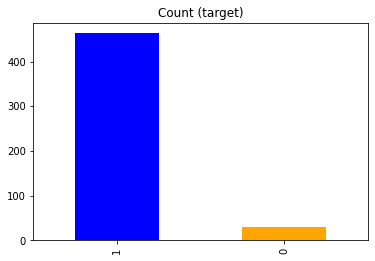

In [52]:
import numpy as np
import pandas as pd

color = ['blue','orange']

target_count = df.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)', color = color);

1    463
0    463
dtype: int64

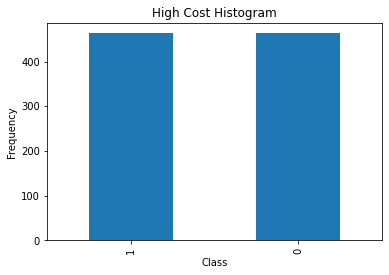

In [66]:
#We will use oversampling technique as per above plotted sample proportion data from the 'target'
#We will use SMOTE method
import matplotlib.pyplot as plt
#import pyodbc as odbc
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

#remove null values from X as X will be used to fit to SMOTE over sampling
from sklearn.impute import KNNImputer
nan = np.nan
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_imt = imputer.fit_transform(X)

#Do the oversampling
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_imt, y)

pd.value_counts(y_sm).plot.bar()
plt.title('High Cost Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y_sm)
#plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [91]:
#Do the train-test split of oversampled data and fit the binary model

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.5, random_state=0, stratify=y_sm)

In [93]:
#Fit the OneClassifier model and check the F1-score on oversampled data:

# one-class svm for imbalanced binary classification
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
X_train_O = X_train[y_train==1]
model.fit(X_train_O)
# detect outliers in the test set
yhat = model.predict(X_test)
# mark inliers 1, outliers -1
y_test[y_test == 1] = 1
y_test[y_test == 0] = -1
# calculate score
score = f1_score(y_test, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)


F1 Score: 0.088


#For this data and selcted criteria to classify VAC from CYT, after the imputation on train-test split and using CYT as 
#master class, the F1-score was 0.240 using one-class svm. Post oversampling the data using SMOTE, the F1-score reduced to 0.088
#hence, we can conclude for the input data oversampling is not suitable.
